# Project: TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project outlines the data analysis process with the selected data set: TMDb Movie Data. This data set contains almost 10,000 movies collected from The Movie Database, with information such as popularity, budget/revenue, genre, release year, and user ratings. 
>
> After wrangling and cleaning the data, I will explore the data with regard to two questions:
>> 1) Which genres are most popular? Which genres are most popular over time?
>
>> 2) Are there any strong relationships associated with the adjusted revenue?

In [1]:
# import libraries for data analysis and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(3)
# Checking the data set to see that it loaded correctly

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.shape
# there are 10,866 rows and 21 columns

(10866, 21)

In [4]:
df.describe()
# a summary of descriptive statistics.
# using the describe function shows a concern: the max runtime of 900 minutes (15 hours) seems 
# unreasonable and therefore could be incorrect. We will explore further.

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


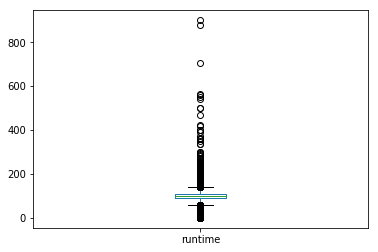

In [5]:
df['runtime'].plot(kind='box')
# this plot shows that there are programs with very high runtimes

In [6]:
df.query('runtime == 900')
# checking to see which film had 900 minutes of runtime to see if that is correct.
# with further research, the programs with higher than 100 minutes appear to be documentaries or mini series.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0


In [7]:
# using .info() gives a better idea of what columns are missing data, and data types
df.info()
# 1) Because we will be analyzing variables that affect popularity of a movie, id and imbd_id will not be 
#    necessary as these are only identifying variables, not predictive
# 2) homepage may not also be an important variable as it is does not tell more than the original_title
# 3) budget and revenue are also unimportant given that we have adjusted for inflation figures
# 4) release_date should be a datetime object
# 5) Values with sentences will also not be useful analyze such as: tagline, overview, keywords

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning

In [8]:
df.drop(['id','imdb_id','tagline','overview','keywords','homepage','budget','revenue'],axis=1, inplace=True)
df.head(1)
#dropping the unnecessary columns

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [9]:
df['release_date'] = df['release_date'].astype('datetime64')
# correcting the data types

In [10]:
df.dropna(inplace=True)
#dropping any values that are Null/NA. These will not be usefull in the analysis.

In [11]:
df.duplicated().sum()
#checking for duplicates

1

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()
# dropping duplicates

0

In [13]:
df.info()
# checking that the changes were reflected

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
popularity              9772 non-null float64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null datetime64[ns]
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 1.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### Question 1: Which genres are most popular? Which genres are more popular over time?

**Part 1: Which genres are most popular?**

Some movies have multiple genres listed. In order to be able to visualize the data, I will simplify it and only consider the first genre listed. This imposes limitations on the other genres that a movie could fit into.

In [14]:
# the first step will be to identify the movies with more than 1 genre
all_genres = df[df['genres'].str.contains('|')]
all_genres

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08


In [15]:
# creating a copy to work off of
first_genre = all_genres.copy()

In [16]:
# splitting the genre column and taking the first one
first_genre['genres'] = first_genre['genres'].apply(lambda x: x.split("|")[0])
first_genre

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08


In [17]:
#dropping the original rows that had more than one genre
df.drop(all_genres.index,inplace = True)

In [18]:
# adding back the new rows that only have one genre
df = df.append(first_genre,ignore_index=True)

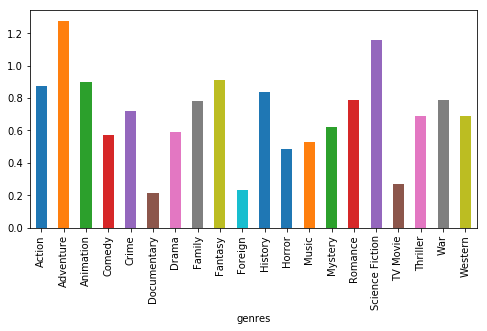

In [19]:
df.groupby('genres').mean()['popularity'].plot(kind='bar',figsize=(8,4));
# this quick plot shows that "Adventure" and "Science Fiction" have the highest average popularity scores

In [20]:
# however let's take a look at how big the sample sizes are for each genre
df['genres'].value_counts()
# this shows that the sample sizes are not uniform which could skew the accuracy of our data

Drama              2223
Comedy             2084
Action             1479
Horror              853
Adventure           550
Thriller            474
Crime               361
Animation           346
Documentary         264
Fantasy             253
Science Fiction     196
Romance             161
Family              128
Mystery             118
Music                79
TV Movie             59
War                  57
Western              42
History              39
Foreign               6
Name: genres, dtype: int64

In [21]:
# let's take only genres that have more than 100 movies to get a better sample of the data
df_100 = df.query('genres != ["Music","TV Movie","War","Western","History","Foreign"]')
df_100['genres'].value_counts()

Drama              2223
Comedy             2084
Action             1479
Horror              853
Adventure           550
Thriller            474
Crime               361
Animation           346
Documentary         264
Fantasy             253
Science Fiction     196
Romance             161
Family              128
Mystery             118
Name: genres, dtype: int64

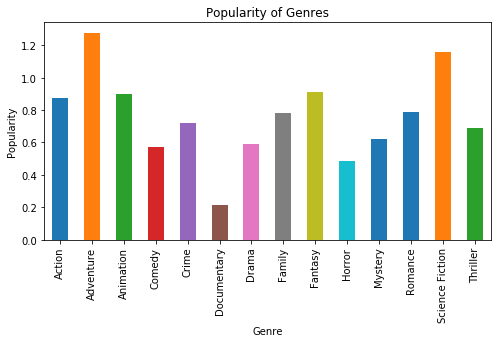

In [22]:
df_100.groupby('genres').mean()['popularity'].plot(kind='bar',figsize=(8,4))
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Popularity of Genres');
# although each genre has varying samples of movies, now we have a more realistic representation of 
# popularity among different genres.

**Part 2: Which genres are more popular over time?**

To see how genre popularity has changed over time, I will split the data into two groups, before the median year and after the median year and compare the two sets.

In [23]:
# finding the median
df_100['release_year'].median()

2005.0

In [24]:
# creating a new column that states whether the movie is before 2005 ('old') or after 2005 ('new')
df_new = df_100.copy()
df_new['old_or_new'] = np.where(df_new['release_year']<=2005, 'Pre_2005', 'Post_2005')
df_new

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,old_or_new
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Post_2005
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Post_2005
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Post_2005
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Post_2005
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Post_2005
6,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08,Post_2005
7,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08,Post_2005
8,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09,Post_2005
9,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08,Post_2005
10,6.200282,Spectre,Daniel Craig|Christoph Waltz|LÃ©a Seydoux|Ralp...,Sam Mendes,148,Action,Columbia Pictures|Danjaq|B24,2015-10-26,3254,6.2,2015,2.253999e+08,8.102203e+08,Post_2005


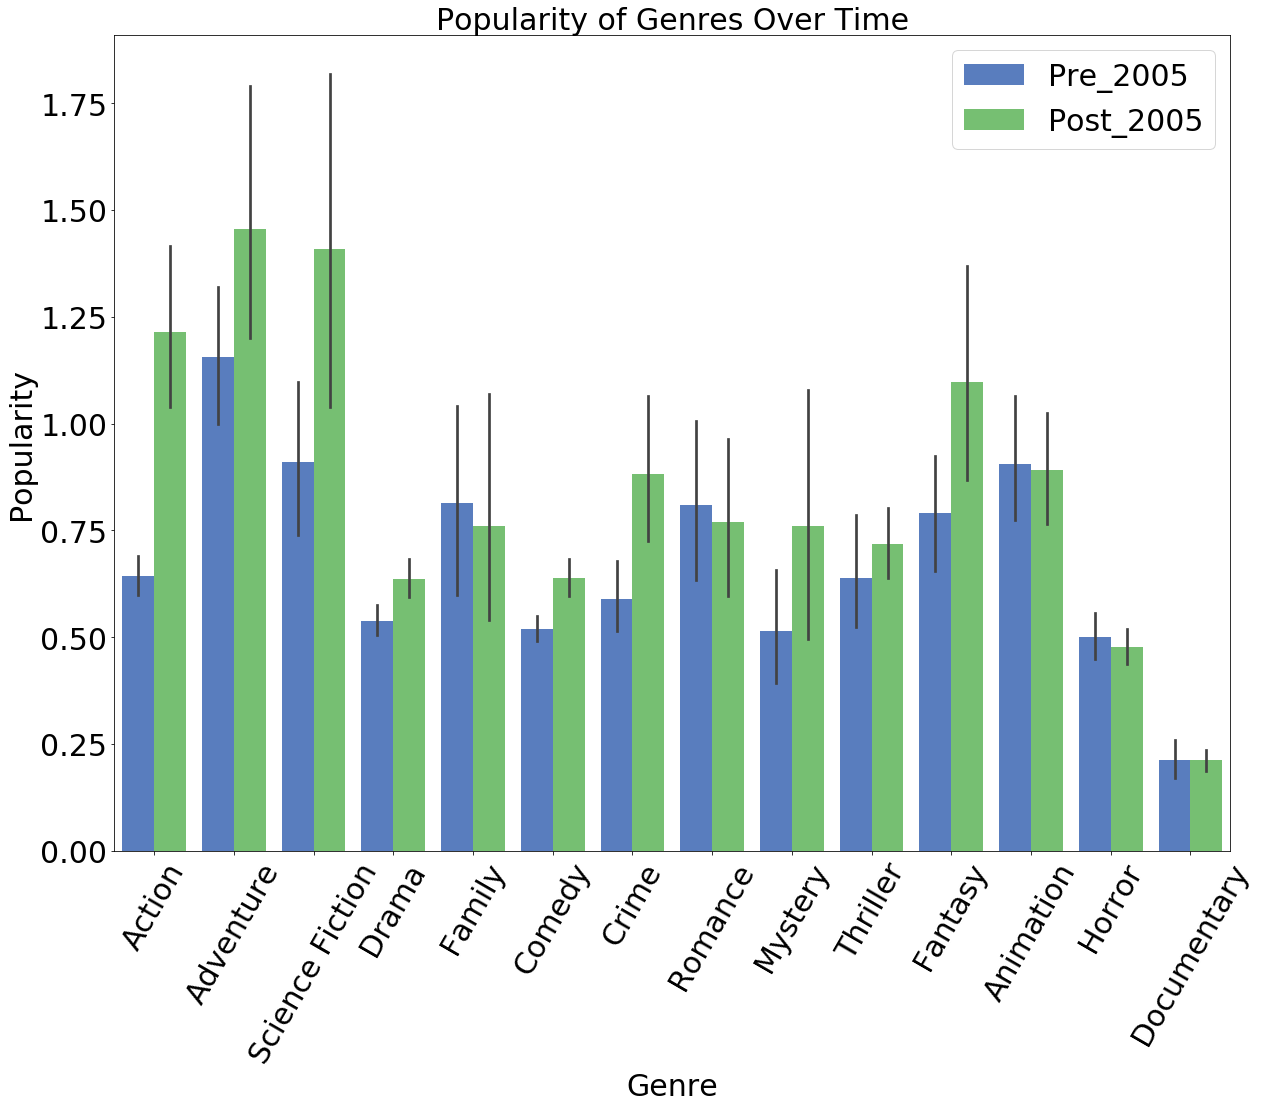

In [25]:
# plotting genres and popularity divided by old and new movies, separated by the median year of 2005
plt.subplots(figsize=(20,15))
plt.xticks(rotation=60)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('Popularity of Genres Over Time',fontsize=30)
plot = sns.barplot(x='genres',y='popularity', data=df_new,hue='old_or_new',hue_order = ['Pre_2005','Post_2005'],palette='muted')
plt.xlabel('Genre',fontsize=30)
plt.ylabel('Popularity',fontsize=30)
plt.legend(fontsize=30);

### Question 1 Summary: 

**Part 1**: After simplifying the "Genres" column to show only the first genre when more than one was listed, and removing genre categories that had less than 100 movies, the genres that appear to have the highest popularity are "Adventure" and "Science Fiction".

**Part 2**: After categorizes the movies into two time periods based on the median release_year (pre_2005 and post_2005), and plotting the genres and popularty next to each other, the pre_2005 and post_2005 most popular genre appears to be "Adventure"

### Question 2: Are there any strong relationships associated with the adjusted revenue?

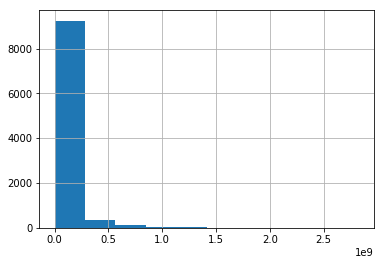

In [26]:
df['revenue_adj'].hist()
# using a quick histogram plot to get a sense of the distribution of revenues it appears that it is 
# highly skewed to the right, and that there could potentially be many values of 0.

In [27]:
df.query('revenue_adj ==0').count()
# it appears that there are 5,022 rows where adjusted revenue is 0 out of the 9,772 in our data set.
# although this is more than half of our data set, I am going to assume that the zeros
# do not accurately reflect the revenue that movie earned.

popularity              5022
original_title          5022
cast                    5022
director                5022
runtime                 5022
genres                  5022
production_companies    5022
release_date            5022
vote_count              5022
vote_average            5022
release_year            5022
budget_adj              5022
revenue_adj             5022
dtype: int64

In [28]:
zero_rev = df.query('revenue_adj ==0')
new_rev = df.copy()
new_rev.drop(zero_rev.index,inplace = True)
# dropping all rows where revenue_adj is 0.
# dropping these values does present the possibility of majorly skewing the data, however, I believe this is the
# best option without having to make other more innaccurate assumptions.

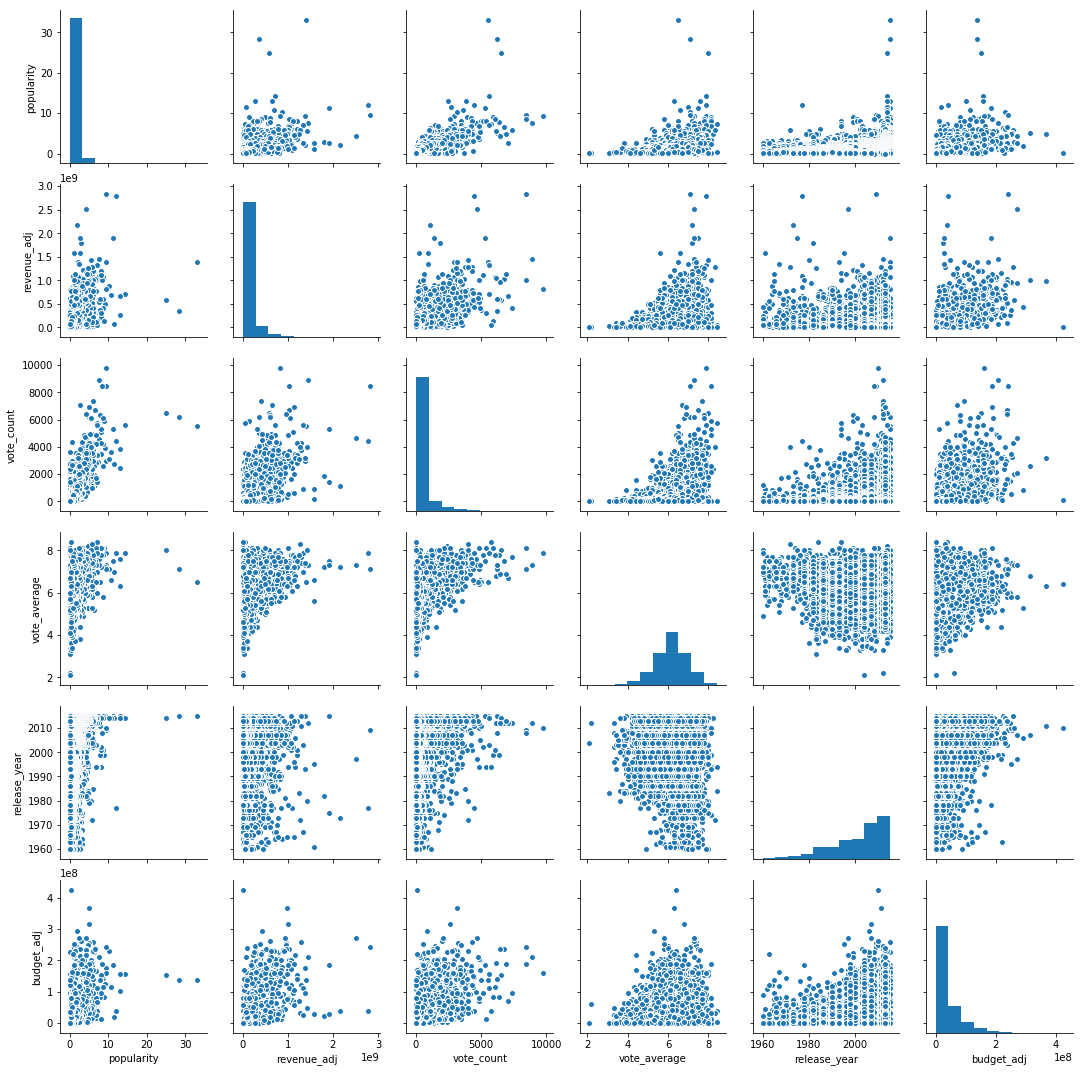

In [29]:
sns.pairplot(new_rev,vars=['popularity','revenue_adj','vote_count','vote_average','release_year','budget_adj']);
# the pair plot shows a quick visualization of the above variables in relation to each other

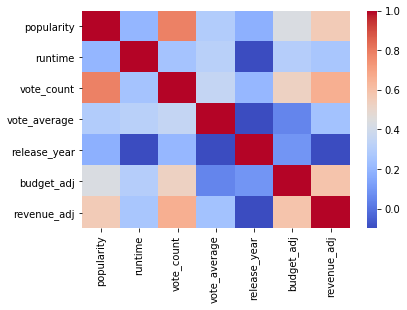

In [30]:
corr = new_rev.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap='coolwarm');
# plotting the correlations in a heatmap gives an idea of stronger correlations.
# with this color scale, more red = more correlated, more blue = less correlated.

In [31]:
new_rev.corr()['revenue_adj']
#taking a closer look at correlations with revenue_adj specifically.

popularity      0.558839
runtime         0.262450
vote_count      0.664582
vote_average    0.245138
release_year   -0.095688
budget_adj      0.590162
revenue_adj     1.000000
Name: revenue_adj, dtype: float64

### Revenue and Strong Relationships Summary: 

The strongest correlations with revenue_adj that can be deduced from these plots and from the correlation matrix are:
    
    vote_count (0.66)
    
    budget_adj (0.59)
    
    popularity (0.56)
    
This method, however, is not conclusive enough to assume causation. They simply show some association.

<a id='limitations'></a>
## Limitations

> 1) For Question 1, **Which genres are most popular? Which genres are most popular over time?**, because there were genres that were discarded due to small sizes and therefore potentially inaccurate data, it is not enough to conclude that Adventure and Science Fiction are the most popular genres without looking at all genres available. Additionally, there were many movies that had more than one genre listed, and my analysis involved only looking at the first one, therefore there might be some debate about which genres are actually appropriate for each title. Lastly, my decision to use the median release_year of 2005 as the point in which to split the data to look at how genre popularity has changed over time could be considered an arbitrary selection might not actually reflect the true changes over time.
>
> 2) For Questions 2,  **Are there any strong relationships associated with the adjusted revenue?** dropping 5,022 rows where revenue_adj was zero, is a significant amount to discard. Given that revenue information was either not available or was inaccurate to begin with, this will likely have a large impact on the results of the analysis. I believe that this way a better way to handle the missing data rather than attribute values that I am not able to accurately predict. Given these limitations, it is difficult to predict accurate correlations.

<a id='conclusions'></a>
## Conclusions

> After working through the data analysis process of wrangling and exploring, and taking the limitations above into consideration, the following conclusions can be made regarding The Movie Database data set:

>> 1) The most popular genres of the total dataset appear to be Adventure and Science Fiction. When looking at the genre popularity over time, Adventure appeared to be the most popular pre-2005 and post-2005 genre.
>
>> 2) A higher Adjusted Revenue is correlated with Vote Count, Adjusted Budget, and Popularity. This however does not indicate causation by any of these variables, as there are limitations with only looking at scatterplots and correlation matrixes.